1/ Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [2]:
data = datasets.fetch_california_housing()
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


2/ Проведите первичный анализ.
a.Проверьте данные на пропуски. Удалите в случае обнаружения.
b.*Нормализуйте один из признаков.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [8]:
df['Population_norm'] = df['Population'] /df['Population'].abs().max()
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Population_norm
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,0.009024
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0.067289
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,0.013901
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,0.015638
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,0.015834


3/ Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [26]:
X = df[['MedInc','HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df['MedHouseVal']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()

4/ Обучите модель регрессии на обучающем множестве.

5/ Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Train_RMSE:{}, Train_R2:{}, Test_RMSE:{}, Test_R2:{}".format(mean_squared_error(y_train,y_pred_train, squared = False),
                                                                               r2_score(y_train, y_pred_train),
                                                                               mean_squared_error(y_test,y_pred_test, squared = False),
                                                                               r2_score(y_test, y_pred_test)) )
model.score(X,y)

Train_RMSE:0.7196757085831575, Train_R2:0.6125511913966952, Test_RMSE:0.7455813830127761, Test_R2:0.5757877060324511


0.6053286007096408

6/ Обучите дерево решений на обучающем множестве.
a. Повторите п. 5 для полученной модели.
b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.

In [51]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

clf = DecisionTreeRegressor(random_state=11)
model = clf.fit(X_train,y_train)

print("Train R2: {}".format(clf.score(X_train, y_train)))
print("Test R2: {}".format(clf.score(X_test, y_test)))

Train R2: 1.0
Test R2: 0.6149073460942183


In [53]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 5.09
|   |--- feature_0 <= 3.07
|   |   |--- feature_2 <= 4.31
|   |   |   |--- feature_0 <= 2.21
|   |   |   |   |--- feature_2 <= 3.42
|   |   |   |   |   |--- feature_3 <= 1.03
|   |   |   |   |   |   |--- feature_7 <= -121.83
|   |   |   |   |   |   |   |--- feature_7 <= -121.96
|   |   |   |   |   |   |   |   |--- feature_5 <= 4.20
|   |   |   |   |   |   |   |   |   |--- feature_4 <= 1692.50
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 0.80
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_3 >  0.80
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |--- feature_4 >  1692.50
|   |   |   |   |   |   |   |   |   |   |--- feature_6 <= 37.85
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_6 >  37.85
|   |   |   |   |   |   |   |   | 

7/ Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.
a. Повторите п. 5 для полученной модели.

In [90]:
model.feature_importances_

array([0.52782379, 0.0522933 , 0.05396304, 0.02893443, 0.02967549,
       0.13007532, 0.09271227, 0.08452236])

<AxesSubplot:>

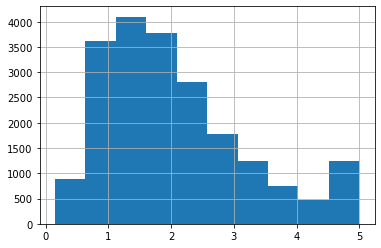

In [96]:
df['MedHouseVal'].hist()

In [111]:
outlier_high_medval = np.quantile(df['MedHouseVal'], 0.75) + 1.5*(np.quantile(df['MedHouseVal'], 0.75)-np.quantile(df['MedHouseVal'], 0.25))

df_v1 = df[df['MedHouseVal'] < outlier_high_medval]
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19569 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MedInc           19569 non-null  float64
 1   HouseAge         19569 non-null  float64
 2   AveRooms         19569 non-null  float64
 3   AveBedrms        19569 non-null  float64
 4   Population       19569 non-null  float64
 5   AveOccup         19569 non-null  float64
 6   Latitude         19569 non-null  float64
 7   Longitude        19569 non-null  float64
 8   MedHouseVal      19569 non-null  float64
 9   Population_norm  19569 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


In [113]:
X = df[['MedInc','HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
depth = [1,2,3,4,5,7,8,9,10,11,12,13]

for i in depth:
    tree = DecisionTreeRegressor(max_depth=i, random_state=11)
    tree.fit(X_train,y_train)
    print("max_depth is {} train score is {} test score is {}".format(i, tree.score(X_train, y_train), tree.score(X_test, y_test)))

max_depth is 1 train score is 0.316996626635902 test score is 0.279511216346382
max_depth is 2 train score is 0.4520447281677594 test score is 0.4244060273337802
max_depth is 3 train score is 0.5378979887726012 test score is 0.5097629887358219
max_depth is 4 train score is 0.5886585082002127 test score is 0.5540288505085006
max_depth is 5 train score is 0.6376786573648903 test score is 0.5997321244428706
max_depth is 7 train score is 0.7166975587892221 test score is 0.6515700686011479
max_depth is 8 train score is 0.7601733883178262 test score is 0.6775504783730109
max_depth is 9 train score is 0.7999255297501255 test score is 0.6854876328120063
max_depth is 10 train score is 0.8347775350789697 test score is 0.6785748908344673
max_depth is 11 train score is 0.8705750262898396 test score is 0.6817819544623656
max_depth is 12 train score is 0.8991184805982447 test score is 0.671743655112354
max_depth is 13 train score is 0.923592500528877 test score is 0.6656537256547919


8/ Сформулируйте выводы по проделанной работе.
a. Сравните точность двух моделей.
b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?
Для получения зачета по этому домашнему заданию, должно быть как минимум реализовано обучение двух моделей, выведена их точность, оптимизирован один параметр дерева решений.
Результат: получены знания по работе с деревом решений

Точность модели линейной регрессии и модели дерева решений сопоставима. Изменяя параметры модели дерева решений, можно повысить оценку точности, например изменив уровень глубины на значение 9.